<a href="https://colab.research.google.com/github/ozakiryota/kaggle/blob/main/store_sales/store_sales_fc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downlad and check datasets

Activate Kaggle API

In [ ]:
from google.colab import files
import os

jason_path = "/root/.kaggle/kaggle.json"

if not os.path.exists(jason_path):
    uploaded = files.upload()

    for fn in uploaded.keys():
        print("User uploaded file '{name}' with length {length} bytes".format(
            name=fn, length=len(uploaded[fn])))

    # Then move kaggle.json into the folder where the API expects to find it.
    !mkdir -p /root/.kaggle/ && mv kaggle.json /root/.kaggle/ && chmod 600 /root/.kaggle/kaggle.json

else:
    print(jason_path, "is already exists.")

Saving kaggle.json to kaggle.json
User uploaded file 'kaggle.json' with length 66 bytes


Download the datasets

In [ ]:
!pip install kaggle
!kaggle competitions download -c store-sales-time-series-forecasting
!unzip -n train.csv.zip
!unzip -n transactions.csv.zip

  0% 0.00/20.1k [00:00<?, ?B/s]
100% 20.1k/20.1k [00:00<00:00, 6.05MB/s]
  0% 0.00/1.35k [00:00<?, ?B/s]
100% 1.35k/1.35k [00:00<00:00, 1.55MB/s]
  0% 0.00/334k [00:00<?, ?B/s]
100% 334k/334k [00:00<00:00, 47.0MB/s]
 48% 10.0M/20.8M [00:00<00:00, 103MB/s]
100% 20.8M/20.8M [00:00<00:00, 130MB/s]
  0% 0.00/21.8k [00:00<?, ?B/s]
100% 21.8k/21.8k [00:00<00:00, 22.5MB/s]
  0% 0.00/998k [00:00<?, ?B/s]
100% 998k/998k [00:00<00:00, 140MB/s]
  0% 0.00/360k [00:00<?, ?B/s]
100% 360k/360k [00:00<00:00, 128MB/s]
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  transactions.csv.zip
  inflating: transactions.csv        


Check the datasets

In [ ]:
import pandas as pd

df = pd.read_csv("/content/train.csv")
# df = pd.read_csv("/content/test.csv")
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


# Fuctions and class

In [ ]:
import pandas as pd

def makeDataList(main_csv_path_list, store_csv_path, oil_csv_path, holiday_csv_path):
    datalist = pd.DataFrame()
    for path in main_csv_path_list:
        datalist = pd.concat([datalist, pd.read_csv(path)], ignore_index=True)
    datalist = pd.merge(datalist, pd.read_csv(store_csv_path), on="store_nbr", how="left")
    datalist = pd.merge(datalist, pd.read_csv(oil_csv_path), on="date", how="left")
    datalist["dcoilwtico"] = datalist["dcoilwtico"].fillna(datalist["dcoilwtico"].mean())
    datalist = pd.merge(datalist, pd.read_csv(holiday_csv_path), on="date", how="left").drop(["locale_name", "description"], axis=1)
    datalist["type_y"] = datalist["type_y"].fillna("NA")
    datalist["locale"] = datalist["locale"].fillna("NA")
    datalist["transferred"] = datalist["transferred"].fillna("NA")

    datalist["date"] = pd.to_datetime(datalist["date"])
    datalist = pd.get_dummies(datalist)

    return datalist

In [ ]:
## TEST
datalist = makeDataList(["/content/train.csv"], "/content/stores.csv", "/content/oil.csv", "/content/holidays_events.csv")
print("datalist.columns =", datalist.columns)
print("datalist.values[0] =", datalist.values[0])
datalist

datalist.columns = Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale',
       'transferred'],
      dtype='object')
datalist.values[0] = [0 Timestamp('2013-01-01 00:00:00') 1 'AUTOMOTIVE' 0.0 0 'Quito'
 'Pichincha' 'D' 13 67.92558899417251 'Holiday' 'National' False]


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,67.925589,Holiday,National,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,67.925589,Holiday,National,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,67.925589,Holiday,National,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,67.925589,Holiday,National,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,67.925589,Holiday,National,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.570000,Holiday,Local,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.570000,Holiday,Local,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.570000,Holiday,Local,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.570000,Holiday,Local,False


In [ ]:
## TEST
from sklearn.model_selection import train_test_split

train_datalist, val_datalist = train_test_split(datalist, test_size=0.1, random_state=1234, shuffle=True)
print(train_datalist)
print(val_datalist)

              id       date  ...  transferred_True  transferred_NA
1577125  1557523 2015-05-27  ...                 0               1
309666    307884 2013-06-22  ...                 0               1
2440800  2398032 2016-09-10  ...                 0               1
1010598   994560 2014-07-14  ...                 0               1
906421    897511 2014-05-20  ...                 0               1
...          ...        ...  ...               ...             ...
978124    963868 2014-06-26  ...                 0               1
1956917  1930937 2015-12-22  ...                 0               0
165158    165158 2013-04-03  ...                 0               1
2548435  2505667 2016-11-10  ...                 0               0
486191    479063 2013-09-26  ...                 0               1

[2748913 rows x 97 columns]
              id       date  ...  transferred_True  transferred_NA
1252648  1236610 2014-11-26  ...                 0               1
724463    715553 2014-02-07  ... 

In [ ]:
import numpy as np

import torch.utils.data as data

class DatasetMaker(data.Dataset):
    def __init__(self, datalist):
        self.input_datalist = datalist.drop(["id", "date", "sales"], axis=1).values.astype(np.float32)
        self.label_datalist = datalist["sales"].values.astype(np.float32)

    def __len__(self):
        return len(self.input_datalist)
    
    def __getitem__(self, index):
        inputs = self.input_datalist[index]
        labels = self.label_datalist[index]
        return inputs, labels

In [ ]:
## TEST
dataset = DatasetMaker(datalist)
inputs0 = dataset.__getitem__(index=0)[0]
labels0 = dataset.__getitem__(index=0)[1]
print("dataset.__len__() =", dataset.__len__())
print("labels0 =\n", labels0)
print("labels0.shape =", labels0.shape)
print("inputs0 =\n", inputs0)
print("inputs0.shape =", inputs0.shape)

dataset.__len__() = 3054348
labels0 =
 0.0
labels0.shape = ()
inputs0 =
 [ 1.       0.      13.      67.92559  1.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       1.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       1.
  0.       0.       0.       0.       0.       0.       1.       0.
  0.       0.       0.       1.       0.       0.       0.       0.
  0.       1.       0.       1.       0.       0.     ]
inputs0.shape = (94,)


In [ ]:
## TEST
import torch

batch_size = 10
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
batch_itr = iter(dataloader)
inputs, labels = next(batch_itr)

# print("inputs =\n", inputs)
print("inputs.size() =", inputs.size())
print("labels =\n", labels)
print("labels.size() =", labels.size())

inputs.size() = torch.Size([10, 94])
labels =
 tensor([   3.0000,    0.0000,  217.0410,    0.0000, 1838.0000,    4.0000,
           9.0000,    0.0000,    9.0000,    0.0000])
labels.size() = torch.Size([10])


In [ ]:
from torch import nn

class Network(nn.Module):
    def __init__(self, fc_dim_list, dropout_rate):
        super().__init__()

        layer_list = []
        for i in range(len(fc_dim_list) - 1):
            layer_list.append(nn.Linear(fc_dim_list[i], fc_dim_list[i+1]))
            if i != len(fc_dim_list) - 2:
                layer_list.append(nn.ReLU(inplace=True))
                layer_list.append(nn.Dropout(p=dropout_rate))
        self.fc = nn.Sequential(*layer_list)

    def forward(self, x):
        x = self.fc(x)
        return x

In [ ]:
## TEST
net = Network(
    fc_dim_list = [dataset.__getitem__(index=0)[0].shape[0], 128, 64, 1],
    dropout_rate = 0.1
)
print(net)
outputs = net(inputs)
print("outputs =\n", outputs)
print("outputs.size() =", outputs.size())

Network(
  (fc): Sequential(
    (0): Linear(in_features=94, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
    (7): ReLU(inplace=True)
  )
)
outputs =
 tensor([[0.6906],
        [0.8913],
        [0.4556],
        [1.7844],
        [1.8276],
        [1.8117],
        [1.1054],
        [1.5088],
        [0.3155],
        [1.0086]], grad_fn=<ReluBackward0>)
outputs.size() = torch.Size([10, 1])


# Training

self.device =  cpu
Network(
  (fc): Sequential(
    (0): Linear(in_features=94, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
    (7): ReLU(inplace=True)
  )
)
----------
Epoch 1/100
train Loss: 368942.5598
val Loss: 258018.0008
----------
Epoch 10/100
train Loss: 208633.8199
val Loss: 178780.2486
----------
Epoch 20/100
train Loss: 192224.8339
val Loss: 153007.5019
----------
Epoch 30/100
train Loss: 186703.9213
val Loss: 146077.2311
----------
Epoch 40/100
train Loss: 182588.6794
val Loss: 147003.3984
----------
Epoch 50/100
train Loss: 179840.9532
val Loss: 145904.6133
----------
Epoch 60/100
train Loss: 178209.0412
val Loss: 141819.9497
----------
Epoch 70/100
train Loss: 174951.9649
val Loss: 147185.9158
----------
Epoch 80/100
train Loss: 174228.8

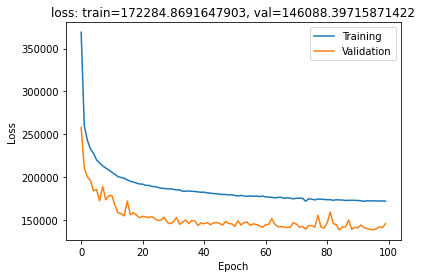

In [ ]:
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torch.optim as optim

class Trainer:
    def __init__(self, train_csv_path, store_csv_path, oil_csv_path, holiday_csv_path, num_epochs, batch_size, lr, save_weights_path):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print("self.device = ", self.device)

        self.num_epochs = num_epochs
        self.save_weights_path = save_weights_path

        datalist = makeDataList([train_csv_path], store_csv_path, oil_csv_path, holiday_csv_path)
        train_datalist, val_datalist = train_test_split(datalist, test_size=0.1, random_state=1234, shuffle=True)
        train_dataset = DatasetMaker(train_datalist)
        val_dataset = DatasetMaker(val_datalist)
        train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
        val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
        
        self.dataloaders_dict = {"train": train_dataloader, "val": val_dataloader}
        self.net = Network(
            fc_dim_list = [dataset.__getitem__(index=0)[0].shape[0], 128, 64, 1],
            dropout_rate = 0.1
        )
        self.net.to(self.device)
        print(self.net)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.net.parameters(), lr=lr)

    def train(self):
        ## time
        start_clock = time.time()
        ## record
        record_loss_dict = {"train": [], "val": []}
        min_loss_epoch = 0.0
        ## loop
        for epoch in range(self.num_epochs):
            if epoch == 0 or not (epoch+1) % (num_epochs // 10):
                print("----------")
                print("Epoch {}/{}".format(epoch+1, self.num_epochs))
            ## phase
            for phase in ["train", "val"]:
                ## setting
                if phase == "train":
                    self.net.train()
                else:
                    self.net.eval()
                ## buffer
                loss_epoch = 0.0
                num_inputs_epoch = 0
                for inputs, labels in self.dataloaders_dict[phase]:
                    inputs = inputs.to(self.device)
                    labels = labels.to(self.device)
                    labels.unsqueeze_(1)
                    ## reset gradient
                    self.optimizer.zero_grad()
                    ## switch computing gradient
                    with torch.set_grad_enabled(phase == "train"):
                        ## forward
                        outputs = self.net(inputs)
                        loss = self.criterion(outputs, labels)
                        ## backward
                        if phase == "train":
                            loss.backward()
                            self.optimizer.step()
                    ## add
                    loss_epoch += loss.item() * inputs.size(0)
                    num_inputs_epoch += inputs.size(0)
                ## average loss
                loss_epoch = loss_epoch / num_inputs_epoch
                record_loss_dict[phase].append(loss_epoch)
                if epoch == 0 or not (epoch+1) % (num_epochs // 10):
                    print("{} Loss: {:.4f}".format(phase, loss_epoch))
            ## save
            if epoch == 0 or record_loss_dict["val"][-1] < min_loss_epoch:
                min_loss_epoch = record_loss_dict["val"][-1]
                torch.save(self.net.state_dict(), self.save_weights_path)
        ## time
        mins = (time.time() - start_clock) // 60
        secs = (time.time() - start_clock) % 60
        print ("training time: ", mins, " [min] ", secs, " [sec]")
        ## graph
        self.showGraph(record_loss_dict)

    def showGraph(self, record_loss_dict):
        graph = plt.figure()
        plt.plot(range(len(record_loss_dict["train"])), record_loss_dict["train"], label="Training")
        plt.plot(range(len(record_loss_dict["val"])), record_loss_dict["val"], label="Validation")
        plt.legend()
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("loss: train=" + str(record_loss_dict["train"][-1]) + ", val=" + str(record_loss_dict["val"][-1]))
        plt.show()

train_csv_path = "/content/train.csv"
store_csv_path = "/content/stores.csv"
oil_csv_path = "/content/oil.csv"
holiday_csv_path = "/content/holidays_events.csv"
num_epochs = 100
batch_size = 1000
lr = 0.001
save_weights_path = "/content/weights.pth"

trainer = Trainer(train_csv_path, store_csv_path, oil_csv_path, holiday_csv_path, num_epochs, batch_size, lr, save_weights_path)
trainer.train()

# Evaluation

In [ ]:
import time
import pandas as pd

import torch

class Evaluator:
    def __init__(self, train_csv_path, test_csv_path, store_csv_path, oil_csv_path, holiday_csv_path, weights_path, save_csv_path):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print("self.device = ", self.device)

        self.save_csv_path = save_csv_path
        self.datalist = makeDataList([train_csv_path, test_csv_path], store_csv_path, oil_csv_path, holiday_csv_path)
        self.datalist = self.datalist.loc[self.datalist["sales"].isna()].drop(["sales"], axis=1)

        self.net = Network(
            fc_dim_list = [self.datalist.drop(["id", "date"], axis=1).values.shape[1], 128, 64, 1],
            dropout_rate = 0.1
        )
        self.net.to(self.device)
        if torch.cuda.is_available():
            loaded_weights = torch.load(weights_path)
            print("Weights have been loaded [GPU -> GPU]:", weights_path)
        else:
            loaded_weights = torch.load(weights_path, map_location={"cuda:0": "cpu"})
            print("Weights have been loaded [GPU -> CPU]:", weights_path)
        self.net.load_state_dict(loaded_weights)
        print(self.net)

    def evaluate(self):
        ## time
        start_clock = time.time()
        ## setting
        self.net.eval()
        ## ndarray -> tensor
        inputs = torch.from_numpy(self.datalist.drop(["id", "date"], axis=1).values.astype(np.float32))
        inputs = inputs.to(self.device)
        ## forward
        with torch.no_grad():
            outputs = self.net(inputs)
        ## save
        self.writeCSV(outputs)
        ## time
        mins = (time.time() - start_clock) // 60
        secs = (time.time() - start_clock) % 60
        print ("evaluation time: ", mins, " [min] ", secs, " [sec]")

    def writeCSV(self, outputs):
        result_df = pd.DataFrame({"id": self.datalist["id"].values, "sales": outputs.cpu().detach().numpy().reshape(-1)})
        result_df.to_csv(self.save_csv_path, index=False)
        print(result_df)


train_csv_path = "/content/train.csv"
test_csv_path = "/content/test.csv"
store_csv_path = "/content/stores.csv"
oil_csv_path = "/content/oil.csv"
holiday_csv_path = "/content/holidays_events.csv"

weights_path = "/content/weights.pth"
save_csv_path = "/content/submission.csv"

evaluator = Evaluator(train_csv_path, test_csv_path, store_csv_path, oil_csv_path, holiday_csv_path, weights_path, save_csv_path)
evaluator.evaluate()

self.device =  cpu
Weights have been loaded [GPU -> CPU]: /content/weights.pth
Network(
  (fc): Sequential(
    (0): Linear(in_features=94, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
    (7): ReLU(inplace=True)
  )
)
            id        sales
0      3000888     0.000000
1      3000889     0.000000
2      3000890     0.000000
3      3000891  2503.836182
4      3000892     0.000000
...        ...          ...
28507  3029395   535.016052
28508  3029396    91.529686
28509  3029397  1123.968384
28510  3029398     0.000000
28511  3029399     0.000000

[28512 rows x 2 columns]
evaluation time:  0.0  [min]  0.11009454727172852  [sec]


# Submission

In [ ]:
import sys

print("Submit the file? (y/n)")
ans = input()
while ans != "y" and ans != "n":
    print("Type 'y' or 'n'")
    ans = input()
if ans == "y":
    !kaggle competitions submit -c store-sales-time-series-forecasting -f submission.csv -m "store_sales_fc.ipynb"

Submit the file? (y/n)
y
100% 417k/417k [00:01<00:00, 364kB/s]
Successfully submitted to Store Sales - Time Series Forecasting